## CO 2:Data Preprocessing


**Example problems**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data=pd.read_csv("Placement_Data.csv")
data.head(4)

,sl_no,gender,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary
0,1,M,91.00,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000.0
1,2,M,78.33,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000.0
2,3,M,NaN,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000.0
3,4,M,52.00,Science,NaN,Sci&Tech,66.0,Mkt&HR,59.43,NaN


# Handling missing values

Calculate the number of null values in each column

In [3]:
data.isnull().sum()

sl_no              0
gender             0
hsc_p              5
hsc_s              0
degree_p           2
degree_t           0
etest_p            4
specialisation     0
mba_p              1
salary            67
dtype: int64

Replace missing values in features that have less than 20 percent null values with appropriate measures.

In [4]:
hsc_p_mean = data['hsc_p'].mean()
etest_p_mean = data['etest_p'].mean()
degree_p_mean= data['degree_p'].mean()
mba_p_mean = data['mba_p'].mean()


data['hsc_p'].fillna(hsc_p_mean, inplace=True)
data['etest_p'].fillna(etest_p_mean, inplace=True)
data['degree_p'].fillna(degree_p_mean, inplace=True)
data['mba_p'].fillna(mba_p_mean, inplace=True)


Remove all the rows where the salary column has null values

In [5]:
data.dropna(subset=['salary'], inplace=True)

In [6]:
data.isna().sum()

sl_no             0
gender            0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

#Detecting Outliers:
1.Visualization (Box Plot):

Check for outlayers using boxplot.

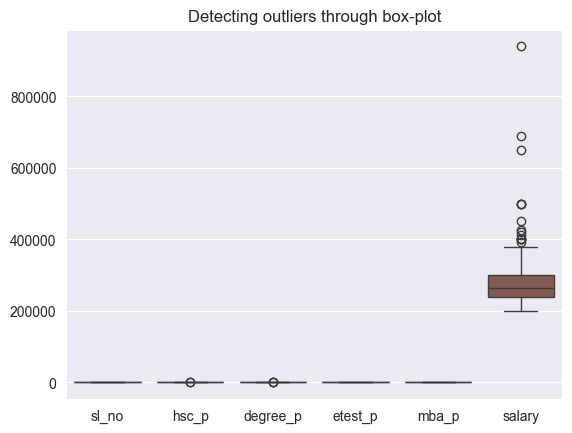

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(5, 6))
sns.boxplot(data)
plt.title('Detecting outliers through box-plot')
# plt.xticks(rotation=90)
plt.show()

2. Using Z-Scores

Cheak for outlayers using Z-scores method.

In [8]:
#another library to compute z_score which can be used to detect outliers
from scipy import stats


# Specify columns to check for outliers
columns_to_check = ['salary']
# Calculate Z-scores for each column
z_scores = stats.zscore(data[columns_to_check])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3
outlier_indices = (z_scores > threshold).any(axis=1)
outliers_df = data[outlier_indices]

print("Rows with Outliers:")
print(outliers_df['salary'])


Rows with Outliers:
119    940000.0
150    690000.0
177    650000.0
Name: salary, dtype: float64


# Handling outliers

1. Remove Outliers:

Remove outlayers using the following three methods.

Index(['sl_no', 'gender', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'etest_p',
       'specialisation', 'mba_p', 'salary'],
      dtype='object')

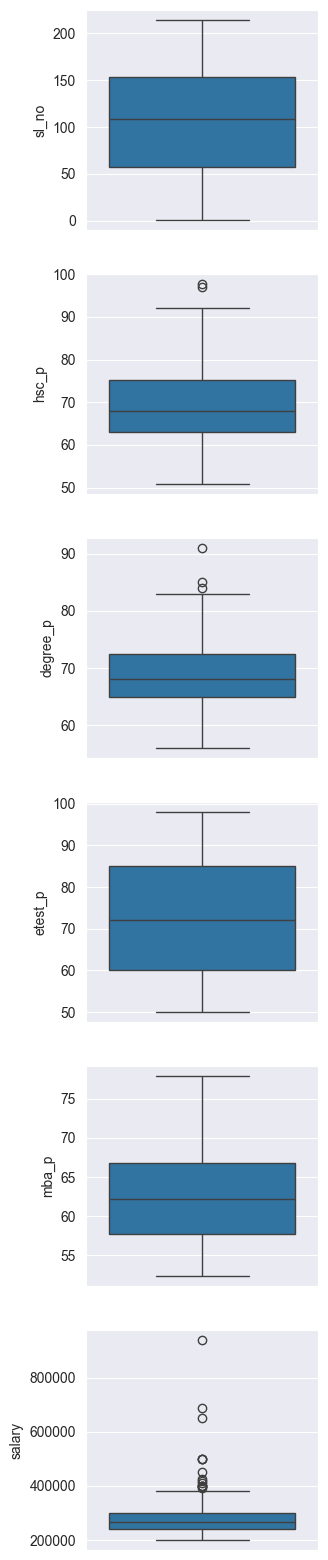

In [15]:
# Plotting box-plot for multiple columns to see the outliers clearly
plt.figure(figsize=(3, 20))

plt.subplot(6, 1, 1)
sns.boxplot(data['sl_no'])

plt.subplot(6, 1, 2)
sns.boxplot(data['hsc_p'])

plt.subplot(6, 1, 3)
sns.boxplot(data['degree_p'])

plt.subplot(6, 1, 4)
sns.boxplot(data['etest_p'])

plt.subplot(6, 1, 5)
sns.boxplot(data['mba_p'])

plt.subplot(6, 1, 6)
sns.boxplot(data['salary'])

data.columns

<Axes: ylabel='salary'>

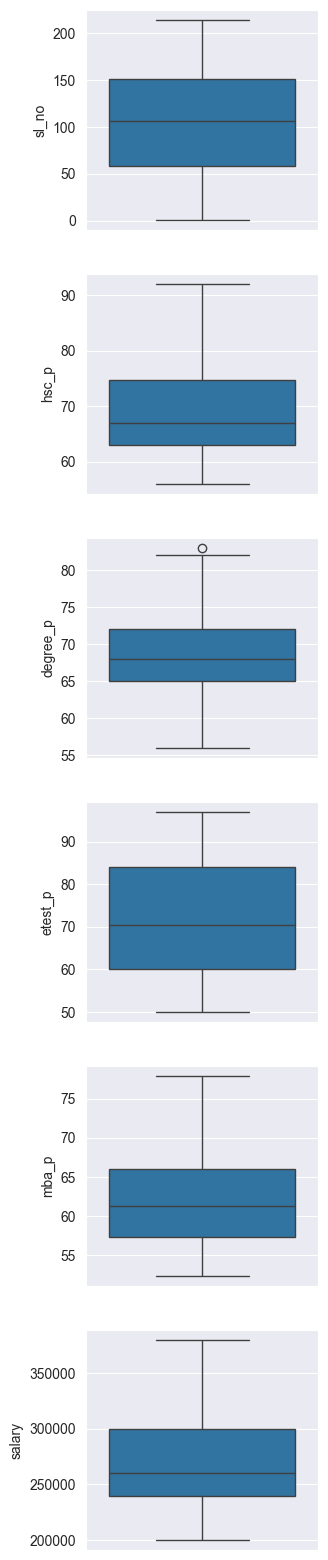

In [34]:
# Removing outliers using Z-score method
# Formula : z = (X — mu) / sigma
z_scores = stats.zscore(data[['sl_no', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']])
threshold = 3
outliersRemoved = data[abs(z_scores) < (threshold)]

plt.figure(figsize=(3, 20))

# We can even plot for each column and check whether the outliers are removed or not
plt.subplot(6, 1, 1)
sns.boxplot(outliersRemovedIQR['sl_no'])

plt.subplot(6, 1, 2)
sns.boxplot(outliersRemovedIQR['hsc_p'])

plt.subplot(6, 1, 3)
sns.boxplot(outliersRemovedIQR['degree_p'])

plt.subplot(6, 1, 4)
sns.boxplot(outliersRemovedIQR['etest_p'])

plt.subplot(6, 1, 5)
sns.boxplot(outliersRemovedIQR['mba_p'])

plt.subplot(6, 1, 6)
sns.boxplot(outliersRemovedIQR['salary'])


2.Quantile-Based Capping and Flooring:

In [36]:
# Cap and floor values using quantiles
# Formula : IQR = Q3 - Q1

# Calculate Q1, Q2 and IQR
Q1 = data[['sl_no', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']].quantile(0.25)
Q3 = data[['sl_no', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']].quantile(0.75)

IQR = Q3 - Q1

# Calculate the lower and upper limits for outlier detection
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
outliersRemovedIQR = data[~((data[['sl_no', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']] < lower_limit) | (data[['sl_no', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']] > upper_limit)).any(axis=1)]


In [ ]:
# Plotting the box-plot for the salary column after removing the outliers using IQR method
sns.boxplot(outliersRemovedIQR['salary'])

<Axes: ylabel='salary'>

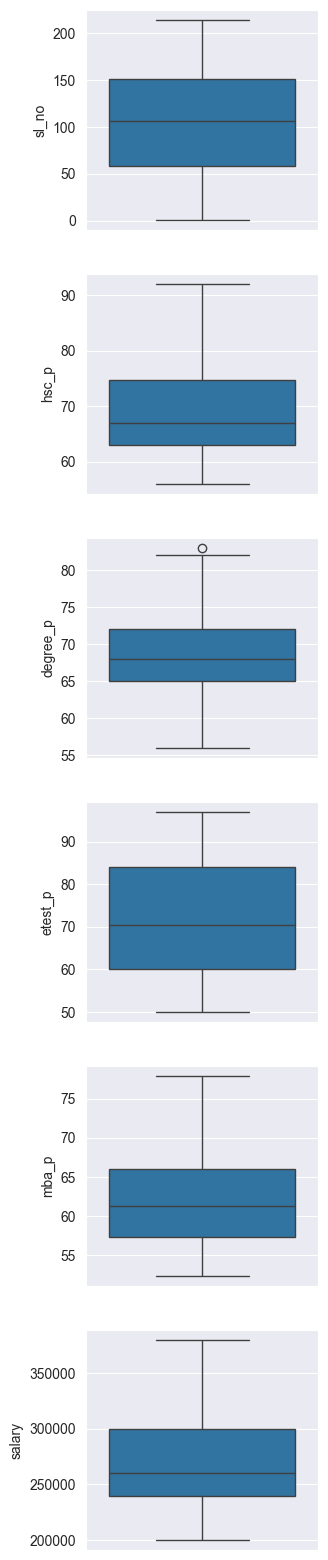

In [33]:
plt.figure(figsize=(3, 20))

# We can even plot for each column and check whether the outliers are removed or not
plt.subplot(6, 1, 1)
sns.boxplot(outliersRemovedIQR['sl_no'])

plt.subplot(6, 1, 2)
sns.boxplot(outliersRemovedIQR['hsc_p'])

plt.subplot(6, 1, 3)
sns.boxplot(outliersRemovedIQR['degree_p'])

plt.subplot(6, 1, 4)
sns.boxplot(outliersRemovedIQR['etest_p'])

plt.subplot(6, 1, 5)
sns.boxplot(outliersRemovedIQR['mba_p'])

plt.subplot(6, 1, 6)
sns.boxplot(outliersRemovedIQR['salary'])

3. Mean/Median Imputation:

In [85]:
# Removing outliers using Mean/Median Imputation method
# Considering only the columns with numerical values

meanImputation = data.copy()
meanImputation = meanImputation[['sl_no', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']]

print("Df before imputation")
meanImputation

Df before imputation


,sl_no,hsc_p,degree_p,etest_p,mba_p,salary
0,1,91.00,58.00,55.0,58.80,270000.0
1,2,78.33,77.48,86.5,66.28,200000.0
2,3,NaN,64.00,75.0,57.80,250000.0
3,4,52.00,NaN,66.0,59.43,NaN
4,5,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,211,82.00,77.60,91.0,74.49,400000.0
211,212,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,73.00,59.0,69.72,295000.0
213,214,66.00,58.00,70.0,60.23,204000.0


In [87]:
imputedMean = meanImputation.fillna((meanImputation.mean()), axis=0)
print("Df after imputation")
imputedMean

Df after imputation


,sl_no,hsc_p,degree_p,etest_p,mba_p,salary
0,1,91.000,58.00000,55.0,58.80,270000.000000
1,2,78.330,77.48000,86.5,66.28,200000.000000
2,3,66.503,64.00000,75.0,57.80,250000.000000
3,4,52.000,66.42061,66.0,59.43,288655.405405
4,5,73.600,73.30000,96.8,55.50,425000.000000
...,...,...,...,...,...,...
210,211,82.000,77.60000,91.0,74.49,400000.000000
211,212,60.000,72.00000,74.0,53.62,275000.000000
212,213,67.000,73.00000,59.0,69.72,295000.000000
213,214,66.000,58.00000,70.0,60.23,204000.000000


In [91]:
# Mean Imputation : Filling the null values with median
meanImputation = data.copy()
meanImputation = meanImputation[['sl_no', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']]
print("Before imputation")
meanImputation

Before imputation


,sl_no,hsc_p,degree_p,etest_p,mba_p,salary
0,1,91.00,58.00,55.0,58.80,270000.0
1,2,78.33,77.48,86.5,66.28,200000.0
2,3,NaN,64.00,75.0,57.80,250000.0
3,4,52.00,NaN,66.0,59.43,NaN
4,5,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,211,82.00,77.60,91.0,74.49,400000.0
211,212,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,73.00,59.0,69.72,295000.0
213,214,66.00,58.00,70.0,60.23,204000.0


In [92]:
meanImputation = meanImputation.fillna((meanImputation.median()), axis=0)
print("After imputation")
meanImputation

After imputation


,sl_no,hsc_p,degree_p,etest_p,mba_p,salary
0,1,91.00,58.00,55.0,58.80,270000.0
1,2,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,64.00,75.0,57.80,250000.0
3,4,52.00,66.00,66.0,59.43,265000.0
4,5,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,211,82.00,77.60,91.0,74.49,400000.0
211,212,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,73.00,59.0,69.72,295000.0
213,214,66.00,58.00,70.0,60.23,204000.0


In [97]:
data[['sl_no', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']] = meanImputation
data

,sl_no,gender,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary
0,1,M,91.00,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000.0
1,2,M,78.33,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000.0
2,3,M,65.00,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000.0
3,4,M,52.00,Science,66.00,Sci&Tech,66.0,Mkt&HR,59.43,265000.0
4,5,M,73.60,Commerce,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...
210,211,M,82.00,Commerce,77.60,Comm&Mgmt,91.0,Mkt&Fin,74.49,400000.0
211,212,M,60.00,Science,72.00,Sci&Tech,74.0,Mkt&Fin,53.62,275000.0
212,213,M,67.00,Commerce,73.00,Comm&Mgmt,59.0,Mkt&Fin,69.72,295000.0
213,214,F,66.00,Commerce,58.00,Comm&Mgmt,70.0,Mkt&HR,60.23,204000.0


# Feature Encoding

1.Label encoding

Apply label encoding to all categorical variables.

In [98]:
data.dtypes

sl_no               int64
gender             object
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
dtype: object

In [99]:
data['gender'].unique()
data['hsc_s'].unique()
data['degree_t'].unique()
data['specialisation'].unique()


array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [100]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
## Apply label encoding for columns gender, hsc_s, degree_t, specialisation

In [105]:
data.head()

,sl_no,gender,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary
0,1,M,91.00,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000.0
1,2,M,78.33,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000.0
2,3,M,65.00,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000.0
3,4,M,52.00,Science,66.00,Sci&Tech,66.0,Mkt&HR,59.43,265000.0
4,5,M,73.60,Commerce,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,425000.0



Conduct one-hot encoding by separating features from target variables.

In [125]:
# Seperating Features and Target
X = data[['gender', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t','etest_p', 'specialisation', 'mba_p',]]
y = data['salary']
#Reverse Mapping and making Categorical
x_cpy = X.copy()
x_cpy["gender"] = [1 if i=="M" else 0 for i in x_cpy["gender"]]
x_cpy["hsc_s"] = [0 if i=="Commerce" else 1 if i=="Science" else 2 for i in x_cpy["hsc_s"]]
x_cpy["degree_t"] = [0 if i=="Comm&Mgmt" else 1 if i=="Sci&Tech" else 2 for i in x_cpy["degree_t"]]
x_cpy["specialisation"] = [1 if i=="Mkt&HR" else 0 for i in x_cpy["specialisation"]]

In [126]:
#Perform one-hot encoding using pandas for dataframe X

In [127]:
##Print X
x_cpy

,gender,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p
0,1,91.00,0,58.00,1,55.0,1,58.80
1,1,78.33,1,77.48,1,86.5,0,66.28
2,1,65.00,2,64.00,0,75.0,0,57.80
3,1,52.00,1,66.00,1,66.0,1,59.43
4,1,73.60,0,73.30,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...
210,1,82.00,0,77.60,0,91.0,0,74.49
211,1,60.00,1,72.00,1,74.0,0,53.62
212,1,67.00,0,73.00,0,59.0,0,69.72
213,0,66.00,0,58.00,0,70.0,1,60.23


Perform feature scaling for numarical values.

MinMax Scaling

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#feature_range arguemnt can be used to specify the min, max range for features while creating the object for MinMaxScaler class. Eg. feature_range=(-1,1)
X_scaled = scaler.fit_transform(x_cpy)

In [130]:
X_scaled

array([[1.        , 0.88962109, 0.        , ..., 0.10416667, 1.        ,
        0.28448276],
       [1.        , 0.68088962, 0.5       , ..., 0.76041667, 0.        ,
        0.56484258],
       [1.        , 0.46128501, 1.        , ..., 0.52083333, 0.        ,
        0.2470015 ],
       ...,
       [1.        , 0.49423394, 0.        , ..., 0.1875    , 0.        ,
        0.69377811],
       [0.        , 0.47775947, 0.        , ..., 0.41666667, 1.        ,
        0.33808096],
       [1.        , 0.34596376, 0.5       , ..., 0.8125    , 1.        ,
        0.33770615]])

In [132]:
columns = x_cpy.columns  # Assuming X is a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=columns)

In [133]:
X_scaled_df

,gender,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p
0,1.0,0.889621,0.0,0.195122,0.5,0.104167,1.0,0.284483
1,1.0,0.680890,0.5,0.670244,0.5,0.760417,0.0,0.564843
2,1.0,0.461285,1.0,0.341463,0.0,0.520833,0.0,0.247001
3,1.0,0.247117,0.5,0.390244,0.5,0.333333,1.0,0.308096
4,1.0,0.602965,0.0,0.568293,0.0,0.975000,0.0,0.160795
...,...,...,...,...,...,...,...,...
210,1.0,0.741351,0.0,0.673171,0.0,0.854167,0.0,0.872564
211,1.0,0.378913,0.5,0.536585,0.5,0.500000,0.0,0.090330
212,1.0,0.494234,0.0,0.560976,0.0,0.187500,0.0,0.693778
213,0.0,0.477759,0.0,0.195122,0.0,0.416667,1.0,0.338081


Code for standardization

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Y_scaled = scaler.fit_transform(x_cpy)
Y_scaled

array([[ 0.73943397,  2.28132847, -0.88628132, ..., -1.2932768 ,
         1.12390297, -0.59440996],
       [ 0.73943397,  1.10309243,  0.80000615, ...,  1.09540343,
        -0.88975652,  0.69307266],
       [ 0.73943397, -0.13651976,  2.48629363, ...,  0.22334557,
        -0.88975652, -0.7665333 ],
       ...,
       [ 0.73943397,  0.04946857, -0.88628132, ..., -0.98995232,
        -0.88975652,  1.28517696],
       [-1.35238581, -0.04352559, -0.88628132, ..., -0.15581002,
         1.12390297, -0.34827357],
       [ 0.73943397, -0.7874789 ,  0.80000615, ...,  1.28498123,
         1.12390297, -0.34999481]])

-------
-------

# **Exercise problems**

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Given Automobile.csv, read the csv file.

In [167]:
automobile = pd.read_csv("Automobile.csv")
automobile

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,usa
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70,usa
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70,usa
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70,usa
4,ford torino,17.0,NaN,302.0,140.0,3449.0,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4.0,140.0,86.0,2790.0,15.6,82,usa
394,vw pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,europe
395,dodge rampage,32.0,4.0,135.0,84.0,2295.0,11.6,82,usa
396,ford ranger,28.0,4.0,120.0,79.0,2625.0,18.6,82,usa


## Handling Null values

2. Calculate number of null values in each column

In [138]:
automobile.isnull().sum()

name             0
mpg              0
cylinders        3
displacement     3
horsepower      12
weight           2
acceleration     3
model_year       0
origin           0
dtype: int64

3. Delete or Fill the null values with appropriate measures

In [139]:
# Filling the null values with mean
automobile['mpg'].fillna(automobile['mpg'].mean(), inplace=True)
automobile['cylinders'].fillna(automobile['cylinders'].mean(), inplace=True)
automobile['displacement'].fillna(automobile['cylinders'].mean(), inplace=True)
automobile['horsepower'].fillna(automobile['horsepower'].mean(), inplace=True)
automobile['weight'].fillna(automobile['weight'].mean(), inplace=True)
automobile['acceleration'].fillna(automobile['acceleration'].mean(), inplace=True)



##Detecting Outliers:


4. Check for outliers using boxplot

<Axes: ylabel='acceleration'>

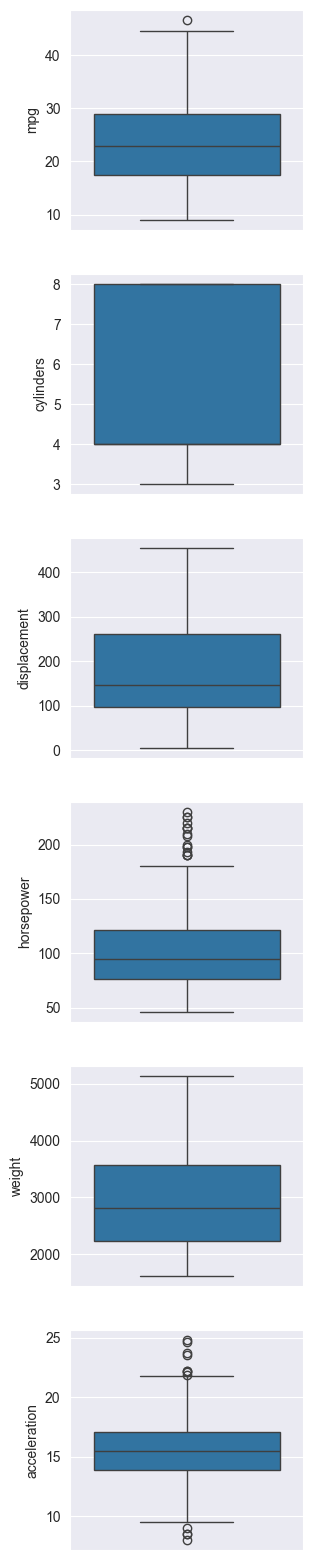

In [140]:
# Plotting box-plot for multiple columns from mpg to model_year []
plt.figure(figsize=(3, 20))

plt.subplot(6, 1, 1)
sns.boxplot(automobile['mpg'])

plt.subplot(6, 1, 2)
sns.boxplot(automobile['cylinders'])

plt.subplot(6, 1, 3)
sns.boxplot(automobile['displacement'])

plt.subplot(6, 1, 4)
sns.boxplot(automobile['horsepower'])

plt.subplot(6, 1, 5)
sns.boxplot(automobile['weight'])

plt.subplot(6, 1, 6)
sns.boxplot(automobile['acceleration'])

<Axes: ylabel='horsepower'>

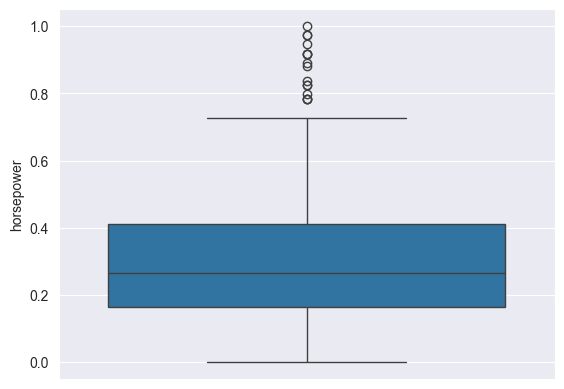

In [142]:
# Applying scaling to the data to see the outliers clearly in the box-plot
from sklearn.preprocessing import MinMaxScaler

col_name = 'horsepower'
scaler = MinMaxScaler()
automobile_scaled = scaler.fit_transform(automobile[[col_name]])
automobile_scaled = pd.DataFrame(automobile_scaled, columns=[col_name])
sns.boxplot(automobile_scaled[col_name])

5. Check outlayers using Z-score method

In [143]:
# Checking outlers using Z-score method
# Formula : z = (X — mu) / sigma

from scipy import stats

# Specify columns to check for outliers
columnsWithOutliers = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Calculate Z-scores for each column
z_scores = stats.zscore(automobile[columnsWithOutliers])

# Threshold for outlier detection of 3 std.dev
threshold = 3

# Print the list of outliers
print("Rows with outliers:")
outliers = np.where(z_scores > threshold)
outliers

Rows with outliers:


(array([  6,  13,  95, 116, 299, 394]), array([3, 3, 3, 3, 5, 5]))

##Handeling outliers

5. Remove outliers

In [144]:
# Removing rthe outliers
print(f"Before removing outliers : {automobile.shape}")
automobile.drop(automobile.index[outliers[0]], inplace=True)
print(f"After removing outliers : {automobile.shape}")

Before removing outliers : (398, 9)
After removing outliers : (392, 9)


6. Remove outlayers using Quantile-Based Capping and Flooring method

In [145]:
# Removing outliers using Quantile-Based Capping and Flooring method
# Formula : IQR = Q3 - Q1

# Calculate Q1, Q2 and IQR
Q1 = automobile[columnsWithOutliers].quantile(0.25)
Q3 = automobile[columnsWithOutliers].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper limits for outlier detection
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


print(f"Before removing outliers : {automobile.shape}")
# Remove outliers
automobile = automobile[~((automobile[columnsWithOutliers] < lower_limit) | (automobile[columnsWithOutliers] > upper_limit)).any(axis=1)]
print(f"After removing outliers : {automobile.shape}")

Before removing outliers : (392, 9)
After removing outliers : (370, 9)


7. Remove outlayers using Mean/Median Imputation method

In [146]:
# Removing outliers using Mean/Median Imputation method
# Formula : z = (X — mu) / sigma

# Calculate Z-scores for each column
z_scores = stats.zscore(automobile[columnsWithOutliers])

# Threshold for outlier detection of 3 std.dev
threshold = 3

# Print the list of outliers
print("Rows with outliers:")
outliers = np.where(z_scores > threshold)

# Removing outliers using Mean/Median Imputation method
print(f"Before removing outliers : {automobile.shape}")
automobile.drop(automobile.index[outliers[0]], inplace=True)
print(f"After removing outliers : {automobile.shape}")



Rows with outliers:
Before removing outliers : (370, 9)
After removing outliers : (370, 9)


/var/folders/3p/5m3b586s5h30b05twqfrv8sh0000gn/T/ipykernel_46953/1789992251.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  automobile.drop(automobile.index[outliers[0]], inplace=True)


# Feature Encoding

label encoding

8. Perform label encoding to all categorical variables.

In [147]:
automobile.dtypes

name             object
mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [148]:
automobile['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'pontiac catalina', 'dodge challenger se', 'chevrolet monte carlo',
       'toyota corona mark ii', 'plymouth duster', 'amc hornet',
       'ford maverick', 'datsun pl510', 'volkswagen 1131 deluxe sedan',
       'peugeot 504', 'audi 100 ls', 'saab 99e', 'bmw 2002',
       'amc gremlin', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'chevrolet impala', 'pontiac catalina brougham',
       'ford galaxie 500', 'plymouth fury iii', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304', 'fiat 124b', 'toyota corolla 1200',
       'datsun 1200', 'volkswagen model 111', 'plymouth cricket',
       'toyota cor

In [151]:
autoNames = [automobile['name'].unique()]
autoNames

[array(['chevrolet chevelle malibu', 'buick skylark 320',
        'plymouth satellite', 'amc rebel sst', 'ford torino',
        'pontiac catalina', 'dodge challenger se', 'chevrolet monte carlo',
        'toyota corona mark ii', 'plymouth duster', 'amc hornet',
        'ford maverick', 'datsun pl510', 'volkswagen 1131 deluxe sedan',
        'peugeot 504', 'audi 100 ls', 'saab 99e', 'bmw 2002',
        'amc gremlin', 'chevrolet vega 2300', 'toyota corona',
        'ford pinto', 'plymouth satellite custom', 'ford torino 500',
        'amc matador', 'chevrolet impala', 'pontiac catalina brougham',
        'ford galaxie 500', 'plymouth fury iii', 'dodge monaco (sw)',
        'ford country squire (sw)', 'pontiac safari (sw)',
        'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
        'pontiac firebird', 'ford mustang', 'mercury capri 2000',
        'opel 1900', 'peugeot 304', 'fiat 124b', 'toyota corolla 1200',
        'datsun 1200', 'volkswagen model 111', 'plymouth cricket',
   

In [180]:
automobile['origin'].unique()

array([2, 1, 0])

In [168]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for columns name, origin
automobile['name'] = label_encoder.fit_transform(automobile['name'])
automobile['origin'] = label_encoder.fit_transform(automobile['origin'])

automobile

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,49,18.0,8.0,307.0,130.0,3504.0,12.0,70,2
1,36,15.0,8.0,350.0,165.0,3693.0,11.5,70,2
2,231,18.0,8.0,318.0,150.0,3436.0,11.0,70,2
3,14,16.0,8.0,304.0,150.0,3433.0,12.0,70,2
4,161,17.0,NaN,302.0,140.0,3449.0,10.5,70,2
...,...,...,...,...,...,...,...,...,...
393,153,27.0,4.0,140.0,86.0,2790.0,15.6,82,2
394,301,44.0,4.0,97.0,52.0,2130.0,24.6,82,0
395,119,32.0,4.0,135.0,84.0,2295.0,11.6,82,2
396,159,28.0,4.0,120.0,79.0,2625.0,18.6,82,2


OneHot encoding

9. Perform One-Hot encoding for categorical variables

In [171]:
automobile_cpy = pd.get_dummies(automobile, columns=['name', 'origin'])
automobile_cpy = automobile_cpy.fillna(automobile_cpy.mean())
automobile_cpy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name_0,name_1,name_2,...,name_298,name_299,name_300,name_301,name_302,name_303,name_304,origin_0,origin_1,origin_2
0,18.0,8.00000,307.0,130.0,3504.0,12.0,70,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,15.0,8.00000,350.0,165.0,3693.0,11.5,70,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,18.0,8.00000,318.0,150.0,3436.0,11.0,70,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,16.0,8.00000,304.0,150.0,3433.0,12.0,70,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,17.0,5.44557,302.0,140.0,3449.0,10.5,70,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4.00000,140.0,86.0,2790.0,15.6,82,False,False,False,...,False,False,False,False,False,False,False,False,False,True
394,44.0,4.00000,97.0,52.0,2130.0,24.6,82,False,False,False,...,False,False,False,True,False,False,False,True,False,False
395,32.0,4.00000,135.0,84.0,2295.0,11.6,82,False,False,False,...,False,False,False,False,False,False,False,False,False,True
396,28.0,4.00000,120.0,79.0,2625.0,18.6,82,False,False,False,...,False,False,False,False,False,False,False,False,False,True


##Scaling

10. Perform MinMax scaling for numerical features

In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
automobile_origin_scaled = scaler.fit_transform(automobile['origin'].values.reshape(-1, 1))
automobile_scaled

array([[0.20833333, 1.        , 0.67078514, ..., 0.        , 0.        ,
        1.        ],
       [0.11904762, 1.        , 0.7664354 , ..., 0.        , 0.        ,
        1.        ],
       [0.20833333, 1.        , 0.69525381, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.625     , 0.2       , 0.28818408, ..., 0.        , 0.        ,
        1.        ],
       [0.50595238, 0.2       , 0.25481771, ..., 0.        , 0.        ,
        1.        ],
       [0.5952381 , 0.2       , 0.25259329, ..., 0.        , 0.        ,
        1.        ]])

11. Perform Standardization for numarical features (not encoded categorical variables)

In [182]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separating numerical and categorical features
numerical_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
categorical_features = ['name', 'origin']

# one-hot encoded
data = automobile_cpy

# Standardizing numerical features
scaler = StandardScaler()
data_numerical_scaled = scaler.fit_transform(data[numerical_features])

# Combining standardized numerical features with categorical features
data_scaled = pd.DataFrame(data_numerical_scaled, columns=numerical_features)
print(data_scaled.head())


        mpg  cylinders  displacement  horsepower    weight  acceleration
0 -0.706439   1.513595      1.093933    0.685653  0.640065     -1.301810
1 -1.090751   1.513595      1.507792    1.620005  0.864514     -1.484531
2 -0.706439   1.513595      1.199804    1.219568  0.559311     -1.667253
3 -0.962647   1.513595      1.065059    1.219568  0.555748     -1.301810
4 -0.834543   0.000000      1.045809    0.952611  0.574749     -1.849974
